## Project Title :  

Data Folder:
Data/tweet.txt
Data/tweet_x.csv

Libraries:
sklearn
scipy

In [2]:
import matplotlib.pyplot as plt
import pandas as pd


from Definations import *
from Utilities import *
from sklearn.feature_selection.univariate_selection import SelectPercentile
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.manifold import isomap
import numpy as np
from scipy.sparse import hstack



# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## First Stage :  Dataset Exploration

### Step _: Benchmark Experiment Replication using ASTD. ###

1. It stands for Arabic Sentemental Tweet Dataset which is used for arabic social sentimental analysis .
2. Consist of 10000 tweets gathered from twitter.
3. Each tweet is Classified as: objective, subjective positive, subjective negative or subjective mixed.

### Step _: Loading the data set in jupyter for exploration. ###

In [3]:
# Import libraries necessary for this project
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

##### Text File

In [4]:
import codecs
filename = codecs.open('data\Tweets.txt', 'r', encoding="utf-8")
outputfile = filename.readlines()
for line in outputfile[0:5]:
    print(line)

بعد استقالة رئيس #المحكمة_الدستورية ننتظر استقالة #رئيس_القضاء #السودان	OBJ

أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر، بمناسبة صدور أولى روايته	POS

البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام العريان الي واشنطن شئ مقرف	NEG

#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية أول فيلم استقصائي يتناول أسرار و كواليس تعرض لأول مرة حول حقيقة	OBJ

الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقولها ملل الله وكيلك تعطيني محاضرة عن الفسق والفجور بجنوب الشيشان #ليه كذا يانبع الحنان	NEUTRAL



##### CSV File

In [5]:
df = pd.read_csv('data\Tweets_x.csv', delimiter='\t',names= ["Tweet", "Classification"])

df.head()

,Tweet,Classification
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استق...,OBJ
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,POS
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,NEG
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,OBJ
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,NEUTRAL


In [6]:
df.describe()

,Tweet,Classification
count,10006,9986
unique,10002,4
top,يوسف الحسيني بالفيديو يفضح كذب قناة الجزيرة وي...,OBJ
freq,2,6675


AS it can be clearly seen, I lost some data in this process since i converted the txt into csv using excel. I removed them to keep dataset consistant but I will fix this issue later

#### Show Count of All Categories ####

In [7]:
df = df.dropna()

In [8]:
df.describe()

,Tweet,Classification
count,9986,9986
unique,9982,4
top,الإخوان يطلقون طفايات الحريق للإيحاء بإلقاء ال...,OBJ
freq,2,6675


OBJ        6675
NEG        1682
NEUTRAL     831
POS         798
Name: Classification, dtype: int64


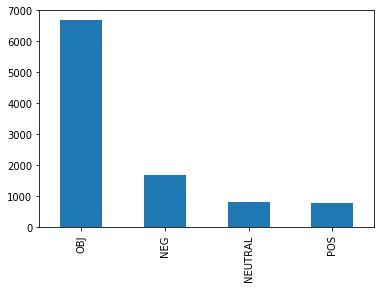

In [9]:
s2 = df.Classification
print(s2.value_counts())
# s2.value_counts().plot(kind='hist') 
s2.value_counts().plot( kind="bar") 
plt.show()

In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# y = np.random.rand(10,4)
# y[:,0]= np.arange(10)
# df = pd.DataFrame(y, columns=["X", "A", "B", "C"])

# ax = df.plot(x="X", y="A", kind="bar")
# df.plot(x="X", y="B", kind="bar", ax=ax, color="C2")
# df.plot(x="X", y="C", kind="bar", ax=ax, color="C3")

# plt.show()

## Model

### Step _: Data PreProcessing ###

In [11]:
ara = AraTweet()

(Data,rating)=ara.read_clean_reviews()

In [12]:
len(rating)

10006

In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

target_rating = le.fit_transform(rating)
# list(le.inverse_transform([0,1,2,3]))

In [14]:
target_rating.shape

(10006L,)

In [15]:
target_rating.data[10005]

'\x00'

In [16]:
le.classes_

array([u'NEG', u'NEUTRAL', u'OBJ', u'POS'], dtype='<U7')

In [17]:
target_rating

array([2, 3, 0, ..., 2, 3, 0], dtype=int64)

#### String Token Count(Bag of Words):

It takes each sentence (all the words) present in the data set in the review section and then splits each of the words present in the form of tokens. The occurrence of these tokens in the whole data set are counted in such a way that the count of the occurrence of each token in a positive and negative feedback (in balanced dataset) or positive, negative and neutral (in unbalanced dataset) are collected separately. Finally, the word frequency of the tokens is calculated.

code:  https://stackoverflow.com/questions/653887/equivalent-for-linkedhashmap-in-python

Ref: https://acadpubl.eu/hub/2018-119-12/articles/5/1211.pdf

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(Data)
X_train_counts.shape

(10006, 37555)

- Above ‘count_vect.fit_transform(twenty_train.data)’, create words/tokens dictionary. such that [n_samples, n_features].

#### Frequency–inverse document frequency(Tfidf):


It measures how important a word is to differentiate each category. It reduce the weightage of more common words like (stop words or common words) which occurs in all tweets. 

Code: https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-5-50b4e87d9bdd 

Ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.121.1424&rep=rep1&type=pdf 

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

C:\Users\Home\Anaconda2\lib\site-packages\sklearn\feature_extraction\text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(10006, 37555)

OBJ        6691
NEG        1684
NEUTRAL     832
POS         799
Name: rating, dtype: int64


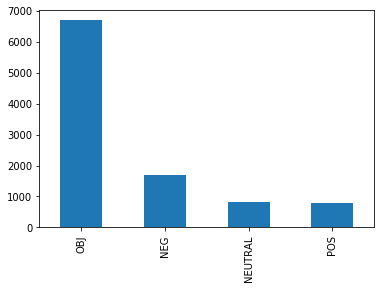

In [20]:
s2 = pd.DataFrame(rating,columns=['rating'])
print(s2.rating.value_counts())
# s2.value_counts().plot(kind='hist') 
s2.rating.value_counts().plot( kind="bar") 
plt.show()

### Step _: Machine implementation using scikit-learn ###

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.cross_validation import cross_val_score
models = [
    LogisticRegression(random_state=0),
    PassiveAggressiveClassifier(random_state=0),
    LinearSVC(tol=1e-3, random_state=0),
    Perceptron(n_iter=100, random_state=0),
    BernoulliNB(binarize=0.5),
    SGDClassifier(loss="hinge", penalty="l2", random_state=0),
    KNeighborsClassifier(n_neighbors=5, metric='euclidean', random_state=0),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    DecisionTreeClassifier(),
    MultinomialNB()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tfidf, rating, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.head()

C:\Users\Home\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: DeprecationWarning: Passing additional arguments to the metric function as **kwargs is deprecated and will no longer be supported in 0.18. Use metric_params instead.


,model_name,fold_idx,accuracy
0,LogisticRegression,0,0.671992
1,LogisticRegression,1,0.676324
2,LogisticRegression,2,0.676662
3,LogisticRegression,3,0.674663
4,LogisticRegression,4,0.662331


In [24]:
cv_df[cv_df['accuracy'] > .68]

,model_name,fold_idx,accuracy
5,PassiveAggressiveClassifier,0,0.686970
7,PassiveAggressiveClassifier,2,0.680160
10,LinearSVC,0,0.702446
11,LinearSVC,1,0.687313
12,LinearSVC,2,0.697151
25,SGDClassifier,0,0.696955
26,SGDClassifier,1,0.691808
27,SGDClassifier,2,0.698651
28,SGDClassifier,3,0.682659


In [25]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    
    learner.fit(X_train[:sample_size] , y_train[:sample_size])
    
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end -start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    
    start = time() # Get start time
    
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5,average='macro' ,pos_label="POS")
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5,average='macro',pos_label="POS")
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results , predictions_test , y_test

Ref: Fixed using https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

In [21]:
#this function to retrive sentimental count in each class
def GetCount(array):
    df = pd.DataFrame(array,columns= ["Class"])
    counts = df.Class.value_counts()
    OBJ = counts['OBJ']
    NEG = counts['NEG']
    NEUTRAL = counts['NEUTRAL']
    POS = counts['POS']
    return [OBJ, NEG, NEUTRAL ,POS]

In [24]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 14 19:05:12 2013

@author1: Mohamed Aly <mohamed@mohamedaly.info>
@author2: Mahmoud Nabil <mah.nabil@yahoo.com>


moved to jupyter notebook and edited by Rabab Alkhalifa <raalkhalifa@iau.edu.sa>
"""


samples_100 = len(y_train)


gr = AraTweet()


classifiers_collection = {}
scores_collection = {}
dataframe_collection = {}
TweetCount_collection = {}
results = {}

FeatuerDataSet = []

for data in datas:
    scores = list()
    
    ###################################load the data####################################
    print("\n" +"="*40)
    print("Loading data:", data['name'])
    print("\n" +"="*40)
    if (LoadValidation):
        (d_train, y_train, d_test, y_test, d_valid, y_valid) = gr.get_train_test_validation(**data['params'])
        if (Evaluate_On_TestSet):
            d_train = np.concatenate((d_train, d_valid))
            y_train = np.concatenate((y_train, y_valid))
        else:
            d_test = d_valid
            y_test = y_valid
    else:
        (d_train, y_train, d_test, y_test) = gr.get_train_test(**data['params'])
    

#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_train) 
#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_test) 
#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_valid) 
    #---------------------------------------------------------------------------------
    TweetCount = [GetCount(y_train ), GetCount(y_test), GetCount(y_valid) ]
    df_tweetCount = pd.DataFrame(TweetCount,columns= ['OBJ', 'NEG', 'NEUTRAL' ,'POS']) 
    df_tweetCount['Dataset'] = ['Train Set','Test Set','Validation Set']
    df_tweetCount['name'] = data['name']
    TweetCount_collection[data['name']] = df_tweetCount
    #---------------------------------------------------------------------------------
    ####################################################################################
    
    for feat_generator in Features_Generators:
        ####################################Features Generation#############################
#         print("Features Generation:", feat_generator['name'])
        X_train = feat_generator['feat_generator'].fit_transform(d_train)
        X_test = feat_generator['feat_generator'].transform(d_test)
        ####################################################################################
        
        
        FeatuerData = [data['name'], feat_generator['name'],X_train.shape[1]]
        FeatuerDataSet.append(FeatuerData)
        for clf in classifiers:

#                     if clf['parameter_tunning']:
#                         # region parameter tunning
# #                         print("tuning: ", clf["name"])
#                         clf['tune_clf'].fit(X_train, y_train)
# #                         print (data['name'])
# #                         print (feat_generator['name'])
# #                         print (clf['tune_clf'].best_estimator_)
#                         # endregion
#                     else:
#                         ####################################Training And Predict################################
                
                    clf_name = clf["name"]
                    print(clf["name"])
                    results[clf_name] = {}
                    for i, samples in enumerate([ samples_100]):
                        results[clf_name][i] , pred , y_test = \
                        train_predict(clf['clf'], samples, X_train, y_train, X_test, y_test)

#                             pred = Train_And_Predict(X_train, y_train, X_test, clf['clf'], clf["name"])

                        (acc, tacc, support, f1 , df) = Evaluate_Result(pred, y_test)

                        score = dict(data=data['name'],
                                         feat_generator=feat_generator['name'],
                                         clf=clf['name'],
                                         # feat_ext=feat_ext['name'],
                                         f1=f1,
                                         acc=acc,
                                         tacc=tacc)

                        df['Classifier'] =  clf["name"]
                        df['feauter_generator'] = feat_generator['name']

                        df['acc'] = acc
                        df['f1']=f1



                        dataframe_collection[ data['name'] + '-' + clf["name"] + '-' + feat_generator['name'] ]  = df
#                         print(clf["name"],df['feauter_generator'] )
                        scores.append(score)

    for key in dataframe_collection.keys():
#         print("\n" +"="*40)
#         print(key)
#         print("-"*40)
#         print(dataframe_collection[key])

        df_Classifiers = pd.DataFrame(classifiers)
        classifiers_collection[data['name']] = df_Classifiers

    #     print("-"*40)
    #     print(df_Classifiers.head())

        df_s = pd.DataFrame(scores)
        scores_collection[data['name']] = df_s
    #     print("-"*40)
    #     print(df_s.head())
df_feauterCount = pd.DataFrame(FeatuerDataSet, columns=['DataSet_Name','Feauter_Generator','Feauters+Count'])
    
# ####################################Testing##############################################
# print(60 * "=")
# for s in scores:
#     print("")
#     for k, v in s.iteritems():
#         print(k, v)-


('Loading data:', '4-balanced')

Logistic Regression


NameError: name 'train_predict' is not defined

In [ ]:
x = scores_collection['4-unbalanced']

x[x['clf'] == 'Logistic Regression']

In [ ]:
balanced_scores = scores_collection['4-unbalanced']
subsetDataFrame = balanced_scores[balanced_scores['feat_generator'].isin(['count_ng1', 'count_ng2','count_ng3'])]
subsetDataFrame[subsetDataFrame['acc'] > .67]

In [ ]:
balanced_scores = scores_collection['4-balanced']
subsetDataFrame = balanced_scores[balanced_scores['feat_generator'].isin(['count_ng1', 'count_ng2','count_ng3'])]
subsetDataFrame[subsetDataFrame['acc'] > .48]

### Step _: Fine tune the chosen model ###  

In [26]:
###### -*- coding: utf-8 -*-
"""
Created on Sun Apr 14 19:05:12 2013

@author1: Mohamed Aly <mohamed@mohamedaly.info>
@author2: Mahmoud Nabil <mah.nabil@yahoo.com>


moved to jupyter notebook and edited by Rabab Alkhalifa <raalkhalifa@iau.edu.sa>
"""


gr = AraTweet()


classifiers_collection = {}
scores_collection = {}
dataframe_collection = {}
TweetCount_collection = {}


FeatuerDataSet = []
for data in datas:
    scores = list()
    
    ###################################load the data####################################
    print("\n" +"="*40)
    print("Loading data:", data['name'])
    print("\n" +"="*40)
    if (LoadValidation):
        (d_train, y_train, d_test, y_test, d_valid, y_valid) = gr.get_train_test_validation(**data['params'])
        if (Evaluate_On_TestSet):
            d_train = np.concatenate((d_train, d_valid))
            y_train = np.concatenate((y_train, y_valid))
        else:
            d_test = d_valid
            y_test = y_valid
    else:
        (d_train, y_train, d_test, y_test) = gr.get_train_test(**data['params'])
    

#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_train) 
#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_test) 
#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_valid) 
    #---------------------------------------------------------------------------------
    TweetCount = [GetCount(y_train ), GetCount(y_test), GetCount(y_valid) ]
    df_tweetCount = pd.DataFrame(TweetCount,columns= ['OBJ', 'NEG', 'NEUTRAL' ,'POS']) 
    df_tweetCount['Dataset'] = ['Train Set','Test Set','Validation Set']
    df_tweetCount['name'] = data['name']
    TweetCount_collection[data['name']] = df_tweetCount
    #---------------------------------------------------------------------------------
    ####################################################################################
    
    for feat_generator in Features_Generators:
        ####################################Features Generation#############################
#         print("Features Generation:", feat_generator['name'])
        X_train = feat_generator['feat_generator'].fit_transform(d_train)
        X_test = feat_generator['feat_generator'].transform(d_test)
        ####################################################################################
        
        
        FeatuerData = [data['name'], feat_generator['name'],X_train.shape[1]]
        FeatuerDataSet.append(FeatuerData)
        for clf in classifiers:
                    
                    if clf['parameter_tunning']:
                        print("\n------\n")
                        print("tuning: ", data['name'] , clf["name"] ,feat_generator['name'])
                        print("\n------\n")
                        
                        grid_fit = clf['tune_clf'].fit(X_train, y_train)
                        best_clf = grid_fit.best_estimator_
                        # Make predictions using the unoptimized and model
                        predictions = (clf["clf"].fit(X_train, y_train)).predict(X_test)
                        best_predictions = best_clf.predict(X_test)


                        # Report the before-and-afterscores
                        print("Best Settings", grid_fit.best_score_ , (grid_fit.best_params_))
                        print("\n Unoptimized model\n------")
                        print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
                        print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5,average='macro')))
                        print("\nOptimized Model\n------")
                        print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
                        print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,average='macro')))


('Loading data:', '4-balanced')


------

('tuning: ', '4-balanced', 'Logistic Regression', 'count_ng1')

------

('Best Settings', 0.408203125, {'C': 1.0})

 Unoptimized model
------
Accuracy score on testing data: 0.4528
F-score on testing data: 0.4486

Optimized Model
------
Final accuracy score on the testing data: 0.4528
Final F-score on the testing data: 0.4486

------

('tuning: ', '4-balanced', 'Passive Aggresive', 'count_ng1')

------

('Best Settings', 0.39375, {'warm_start': False, 'loss': 'hinge', 'C': 0.3, 'n_jobs': 1, 'shuffle': True, 'verbose': 0, 'n_iter': 15, 'random_state': 0})

 Unoptimized model
------
Accuracy score on testing data: 0.4308
F-score on testing data: 0.4279

Optimized Model
------
Final accuracy score on the testing data: 0.4308
Final F-score on the testing data: 0.4275

------

('tuning: ', '4-balanced', 'SVM', 'count_ng1')

------

('Best Settings', 0.414453125, {'loss': 'hinge', 'C': 0.1, 'intercept_scaling': 0.3, 'fit_intercept': True, 'max_iter'

C:\Users\Home\Anaconda2\lib\site-packages\sklearn\naive_bayes.py:664: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


('Best Settings', 0.43359375, {'alpha': 0.6, 'fit_prior': True})

 Unoptimized model
------
Accuracy score on testing data: 0.4686
F-score on testing data: 0.4768

Optimized Model
------
Final accuracy score on the testing data: 0.4717
Final F-score on the testing data: 0.4774

------

('tuning: ', '4-balanced', 'Logistic Regression', 'count_ng2')

------

('Best Settings', 0.410546875, {'C': 1291.54967})

 Unoptimized model
------
Accuracy score on testing data: 0.4450
F-score on testing data: 0.4412

Optimized Model
------
Final accuracy score on the testing data: 0.4371
Final F-score on the testing data: 0.4341

------

('tuning: ', '4-balanced', 'Passive Aggresive', 'count_ng2')

------

('Best Settings', 0.4, {'warm_start': False, 'loss': 'hinge', 'C': 0.5, 'n_jobs': 1, 'shuffle': True, 'verbose': 0, 'n_iter': 15, 'random_state': 0})

 Unoptimized model
------
Accuracy score on testing data: 0.4387
F-score on testing data: 0.4356

Optimized Model
------
Final accuracy score on the

C:\Users\Home\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


('Best Settings', 0.6807793180966654, {'binarize': 0.0, 'alpha': 0.6, 'fit_prior': False})

 Unoptimized model
------
Accuracy score on testing data: 0.6698
F-score on testing data: 0.1898

Optimized Model
------
Final accuracy score on the testing data: 0.6808
Final F-score on the testing data: 0.2716

------

('tuning: ', '4-unbalanced', 'mnb', 'count_ng1')

------

('Best Settings', 0.6694142625202948, {'alpha': 1.0, 'fit_prior': True})

 Unoptimized model
------
Accuracy score on testing data: 0.6863
F-score on testing data: 0.3190

Optimized Model
------
Final accuracy score on the testing data: 0.6863
Final F-score on the testing data: 0.3190

------

('tuning: ', '4-unbalanced', 'Logistic Regression', 'count_ng2')

------

('Best Settings', 0.6882727613338329, {'C': 1.0})

 Unoptimized model
------
Accuracy score on testing data: 0.6933
F-score on testing data: 0.3804

Optimized Model
------
Final accuracy score on the testing data: 0.6933
Final F-score on the testing data: 0.38

### Step _: Performance Measures for Classifieres ###  

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).


Ref: Udacity

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# print('Accuracy score: ', format(accuracy_score(rating, predictions)))
# print('Precision score: ', format(precision_score(rating, predictions)))
# print('Recall score: ', format(recall_score(rating, predictions)))
# print('F1 score: ', format(f1_score(rating, predictions)))

### Step 7: Conclusion ###

In [ ]:
# # TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries



# # TODO: Initialize the classifier
# clf = RandomForestClassifier( random_state=0)

# # TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# # HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

# # Number of trees in random forest
# # n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10 ,20]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4 , 8]
# # Method of selecting samples for training each tree
# # bootstrap = [True, False]
# # Create the random grid
# parameters = {# 'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}
# #               ,'bootstrap': bootstrap}

# #Ref. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# # TODO: Make an fbeta_score scoring object using make_scorer()
# scorer = make_scorer(fbeta_score, beta=0.5)

# # TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
# grid_obj =  GridSearchCV(clf , parameters ,scoring=scorer)

# # TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
# grid_fit = grid_obj.fit(X_train,y_train)

# # Get the estimator
# best_clf = grid_fit.best_estimator_

# print(best_clf)

# # Make predictions using the unoptimized and model
# predictions = (clf.fit(X_train, y_train)).predict(X_test)
# best_predictions = best_clf.predict(X_test)

# # Report the before-and-afterscores
# print("Unoptimized model\n------")
# print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
# print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5,average='macro')))
# print("\nOptimized Model\n------")
# print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
# print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,average='macro')))

In [25]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import LinearSVC
# from sklearn.cross_validation import cross_val_score
# models = [
#     RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
#     LinearSVC(),
#     MultinomialNB(),
#     LogisticRegression(random_state=0),
# ]
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
# entries = []
# for model in models:
#     model_name = model.__class__.__name__
#     accuracies = cross_val_score(model, X_train_tfidf, rating, scoring='accuracy', cv=CV)
#     for fold_idx, accuracy in enumerate(accuracies):
#         entries.append((model_name, fold_idx, accuracy))
        
        
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# cv_df